### American vs. European Options

#### European Options:
- Exercisable only at expiration.
- Call: $C = S_0 N(d_1) - X e^{-rT} N(d_2)$
- Put: $P = X e^{-rT} N(-d_2) - S_0 N(-d_1)$
- $d_1 = \frac{\ln(S_0 / X) + (r + \sigma^2 / 2)T}{\sigma \sqrt{T}}$, $d_2 = d_1 - \sigma \sqrt{T}$.

#### American Options:
- Exercisable any time up to expiration.
- Call and Put pricing lacks a general closed-form solution like Black-Scholes for European options.
- American Call (no dividends): Price  aligns with European call due to no early exercise advantage.
- American Put: Early exercise can be optimal; pricing requires numerical methods (e.g., binomial trees - Math134C).




### Question 1

Suppose the European $P_{40}(20)=10$ suddenly becomes an American option. Are there arbitrage opportunities? Explain by carrying out computations.


#### Solution:
For a put option with a strike price (K) of $40 and the underlying asset priced at $20, the intrinsic value is $K - S = $40 - $20 = $20. Since the European put option is priced at $10, which is below its intrinsic value, converting it to an American option (which can be exercised immediately for its intrinsic value) presents an arbitrage opportunity. One could buy the option for $10 and exercise it immediately for a payoff of $20, securing a risk-free profit of $10.

### Question 2

Suppose the European $P_{40}(20)=30$ suddenly becomes an American option. Are there arbitrage opportunities? Give an explination.




#### Solution:
With the same strike price (K) of $40 and underlying asset priced at $20, the intrinsic value remains $20. The European put option's price at $30 is above the intrinsic value. While converting to an American option allows immediate exercise, doing so would yield $20, which is less than the purchase price of $30. Hence, there's no arbitrage opportunity in this scenario; it would not be rational to exercise the option immediately, as its market price exceeds the payoff from exercising.

### Question 3
Sketch both the American call option $C_{50}(S, t)$ and the American put option $P_{50}(S, t)$ for $t < T$. Explain what is happening with each graph.


/var/folders/2m/j7q6pjm97vb7vx436d32d30w0000gn/T/ipykernel_47657/3126366099.py:7: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))


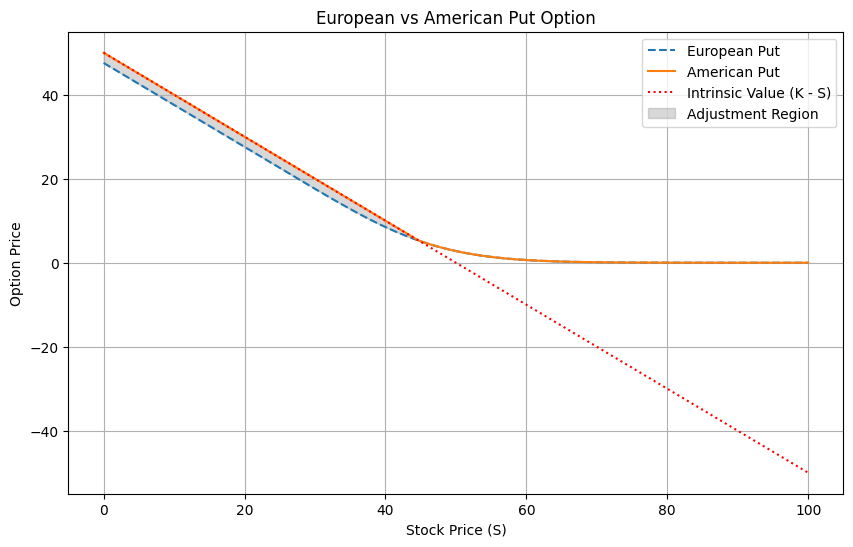

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def black_scholes_put(S, K, T, r, sigma):
    # European Put option price using Black-Scholes formula
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

# Parameters (Fill in with appropriate values)
S = np.linspace(0, 100, 500)  # Stock price range
K = 50  # Strike price
T = 1  # Time to maturity
r = 0.05  # Risk-free interest rate
sigma = 0.2  # Volatility

# Calculate European Put prices
european_put_prices = black_scholes_put(S, K, T, r, sigma)

# Adjustment for American Put
american_put_prices = np.maximum(european_put_prices, K - S)  # Max of European Put or intrinsic value (K - S)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(S, european_put_prices, label='European Put', linestyle='--')
plt.plot(S, american_put_prices, label='American Put')
plt.plot(S, K - S, label='Intrinsic Value (K - S)', linestyle=':', color='red')

# Highlighting the adjustment area
plt.fill_between(S, european_put_prices, american_put_prices, color='grey', alpha=0.3, label='Adjustment Region')

plt.title('European vs American Put Option')
plt.xlabel('Stock Price (S)')
plt.ylabel('Option Price')
plt.legend()
plt.grid(True)
plt.show()
